<a href="https://colab.research.google.com/github/joaochenriques/IST_MCTE/blob/main/Tides/Faxial_Ftide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3921  100  3921    0     0  20421      0 --:--:-- --:--:-- --:--:-- 20421


In [2]:
import matplotlib.pyplot as mpl
import numpy as np
import mpl_utils as mut
mut.config_plots()

mpl.rcParams["figure.figsize"] = (6,4.5)
%config InlineBackend.figure_formats = ['svg']

In [3]:
def f_R( phi ):
    fr =  np.cos(phi)
    ff = -np.sin(phi)

    fx = fr*np.cos(phi) - ff*np.sin(phi)
    fy = fr*np.sin(phi) + ff*np.cos(phi)
    
    return ( fx, fy ) 

def f_tide( phi ):
    fr = (+3.0*np.cos(phi)**2 - 1.0)
    ff = (-3.0*np.sin(2.0*phi) / 2.0)

    fx = fr*np.cos(phi) - ff*np.sin(phi)
    fy = fr*np.sin(phi) + ff*np.cos(phi)
    
    return ( fx, fy ) 

In [4]:
cphi = 2.0*np.pi*np.linspace( 0.0, 1.0, 210 )
circ = np.column_stack( ( np.cos(cphi), np.sin(cphi) ) )

In [5]:
phi = 2.0*np.pi*np.linspace( 0.0, 1.0, 21 )

tail = np.column_stack( ( np.cos(phi), np.sin(phi) ) )
head_fR = np.column_stack( f_R( phi ) )
head_ft = np.column_stack( f_tide( phi ) )

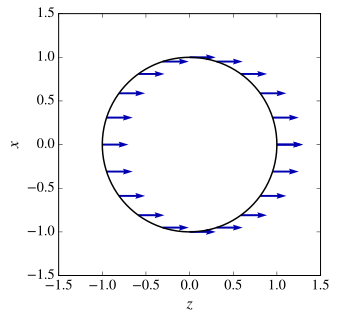

In [11]:
mpl.plot( circ[:,0], circ[:,1], 'k-' )
mpl.quiver( tail[:,0], tail[:,1], head_fR[:,0], head_fR[:,1], color='#0000B0', scale=10, zorder=2)
mpl.xlim(-1.5,1.5)
mpl.ylim(-1.5,1.5)
mpl.xlabel("$z$")
mpl.ylabel("$x$")
mpl.gca().set_aspect('equal', 'box')
mpl.savefig( 'F_tide_T1.pdf', bbox_inches='tight', pad_inches=0 )

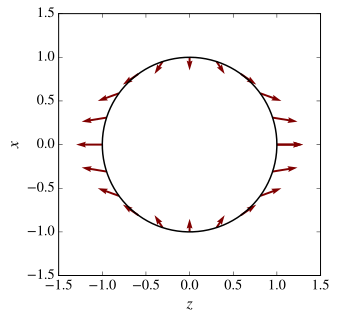

In [7]:
mpl.plot( circ[:,0], circ[:,1], 'k-' )
mpl.quiver( tail[:,0], tail[:,1], head_ft[:,0], head_ft[:,1], color='#800000', scale=20, zorder=2)
mpl.xlim(-1.5,1.5)
mpl.ylim(-1.5,1.5)
mpl.xlabel("$z$")
mpl.ylabel("$x$")
mpl.gca().set_aspect('equal', 'box')
mpl.savefig( 'F_tide_T2.pdf', bbox_inches='tight', pad_inches=0 )